# Assignment 3 - Supervised Learning to Predict Voter Turnout

## *Derek  Wales*
Netid: XXXX

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

### Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

Source: <br>
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f <br>
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ <br>
https://www.kaggle.com/benhamner/2016-us-election#county_facts_dictionary.csv

**ANSWERS**

4.A: Identifying a Machine Learning Question <br>
For this question I chose to look at county wide demographics and election results in 2016 to see if demographics change voting patterns. I found this topic particularly interesting because it is an important election year for our country. Especially in the wake of the impeachment and the Democratic Primary, it is important to be able to identify voting patterns of various groups.

4.B: Loading in and Merging the Data

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [2]:
# Part B: Loading in and Merging the Data
# Note, the analysis only looked at the 2016 Election and did not include 3rd Party Candidates

demographics_df = pd.read_csv('_data\county_facts_no_states_v2.csv')
voting_df = pd.read_csv('_data\countypres_2000-2016_edited_pre_python_v3.csv')

# Completing the merge
analysis_df_v1 = pd.merge(demographics_df, voting_df, on = 'fips', how = 'left', indicator = False)

# Fixing string values in the response variable.
analysis_df_v1["winning_cand_percentage"] = pd.to_numeric(analysis_df_v1["winning_cand_percentage"], errors ='coerce')

4.C: <br>
For my project I wanted to predict the winning candidate percentage (winning_cand_percentage) using demographic data. 
At the onset, there were two separate datasets one for county demographics in 2014 and the other on election results by county for 2000-16.  

Because of this, the data did require a lot of preprocessing, most of which was done in excel. I first cut the elections data frame to just 2016, and I combined several of the rows of the data into one (so that each county was one row containing the complete results for the 2016 election). 

This resulted in rows that had total Republican/Democrat votes, State, FIPS (county code) and total votes. I then created a hybrid metric which determined, by county, the percentage of the vote the winning candidate had. If the value was negative that meant that Hilary Clinton had won that county, and if it was positive, that meant a victory for Donald Trump.  

I then went through a similar process with the demographic data by county. Shrinking from 54 predictors to 24 that all primarily focused on age of the area, population density, household income, and racial makeup. 

After which I merged the two datasets based on the FIPS code and began my analysis.


 Note: Several transformations were attempted but they were unsuccessful. Ultimately there was no significant deviations from the assumptions of Linear Regression

 Linear Model Assumptions: Linearity, Independence of Errors, Equal Variance, and Normality


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


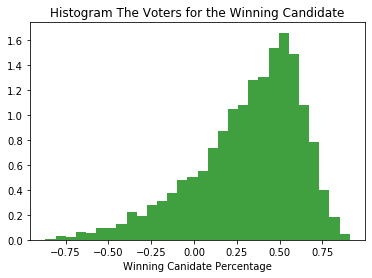

In [3]:
# Important command analysis_df_v1.columns.to_list()
print("\n Note: Several transformations were attempted but they were unsuccessful. Ultimately there was no significant deviations from the assumptions of Linear Regression")
print("\n Linear Model Assumptions: Linearity, Independence of Errors, Equal Variance, and Normality")

# Plotting a histogram of the response video "winning_cand_percentage"
n, bins, patches = plt.hist(analysis_df_v1["winning_cand_percentage"], 30, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Winning Canidate Percentage')
plt.title('Histogram The Voters for the Winning Candidate')
plt.show()

4.D:<br>
Based on my EDA I chose to use Linear Regression, one because it will give a specific victory margin, and two it allows for inference on how much things like median income and population density effect voting. 

In [4]:
# Building the model
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

varibles_1='winning_cand_percentage~C(state_abbreviation)+population_14+p_under18+p_over65+p_female+p_white+p_black+p_nAmerican+p_asian+p_pacificIsland+p_latino+p_foreignBorn+p_NotEnglish+p_highSchool+p_bachelors+p_vets+p_homeOwnership+p_multiStructures+person_per_house+median_hh_income+p_below_pov+pop_per_mile'           

In [5]:
# Part E: Building the model with sklearn.

# Making sure there are no missing values in the DF
analysis_df_v2 = pd.DataFrame(analysis_df_v1).fillna(0)

# Changing state variblaes to categorical
analysis_df_v2['state_abbreviation']=pd.get_dummies(analysis_df_v1['state_abbreviation'])

# Fitting on the entire dataset
X = analysis_df_v2[['state_abbreviation',"population_14",'p_under18','p_over65','p_female','p_white','p_black','p_nAmerican','p_asian','p_pacificIsland','p_latino',
                'p_foreignBorn','p_NotEnglish','p_highSchool','p_bachelors','p_vets','p_homeOwnership','p_multiStructures','person_per_house',
               'median_hh_income', 'p_below_pov']].values

y = analysis_df_v2['winning_cand_percentage'].values

regressor = LinearRegression()  
regressor.fit(X, y)
print('The original model resulted in an R^2 of:', regressor.score(X,y))

The original model resulted in an R^2 of: 0.6977220560803653


Part E:<br>
The model preformed well, with an $R2$ of 0.698. Meaning that the predicted values closely match the real life response variable.

Part F: Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it. <br>
For this problem I chose to use train and test split because it allowed for a hold out set of unseeen data to compare the model to. 

In [6]:
# Part G: Running analysis and showing performance. 

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Fitting
regressor.fit(X_train, y_train)

# Predicting
y_pred = regressor.predict(X_test)

# Actual vs predicted by county
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
0,0.234572,0.359107
1,0.194420,0.082744
2,0.846690,0.598101
3,0.267769,0.378117
4,0.600132,0.430264


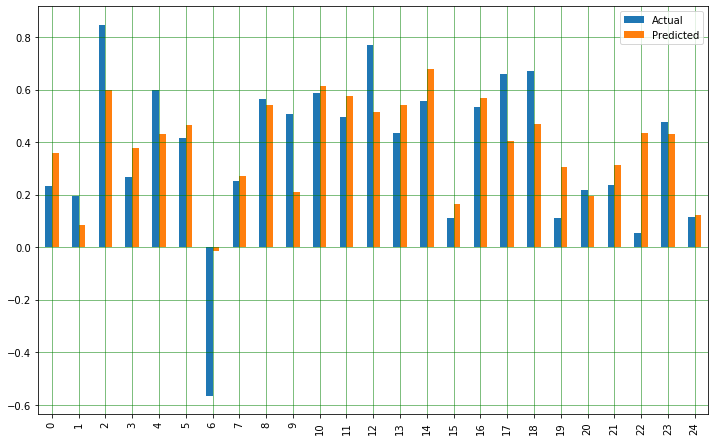

In [7]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,7.5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [8]:
# from sklearn.metrics import roc_curve               
# from sklearn.metrics import precision_recall_curve  
# import sklearn.metrics as metrics                  
# from sklearn.metrics import auc    


In [9]:
metrics.r2_score(y_test, y_pred) # 0.0.6923

0.6922920074372811

Part G: Doing a train and test split slightly decreased the model performance, with a final $R2$ value of 0.692. Meaning that the predicted values decently match the real world results, especially considering that this is social studies data. 

Part H: Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work.

Overall the model preformed well, scoring an R2 of 0.856 on the full dataset (results below), but the main advantage of using linear models is its interpretability. Which becomes especially clear when I use Statsmodels to print out a summary after I ran the updated model on the full dataset. This gave me a granular view into voting patterns by state and demographics. 

For example, being in Maine alone increasing the percentage of voting Democrat by 42% while being in Texas increases the percentage of Republican voters by 23%. There are also several other interesting trends as well. For example, for each percentage point of the population is below the poverty line, that increases the percent of Democratic Votes by 0.56% but as the percentage of whites as a percentage of the population goes up it increases the Republicans by 0.85%.

However one weakness of this model is it only looks at the 2016 election and is probably not very generalizable because Trump is such a unique figure. Further work would probably focusing on models that are centered on Congressional and Senate races as well as Presidential ones to see if that effects voting patterns. 

Full model summary below.

In [10]:
# Statsmodels Code
# Running the first model on both train and test data.
q4_model_1 = smf.ols(varibles_1, data = analysis_df_v1).fit()
print(q4_model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     winning_cand_percentage   R-squared:                       0.856
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     255.2
Date:                     Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                             09:46:41   Log-Likelihood:                 2267.6
No. Observations:                     3115   AIC:                            -4391.
Df Residuals:                         3043   BIC:                            -3956.
Df Model:                               71                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------